In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load the data
from google.colab import files # Use to load data on Google Colab
uploaded = files.upload() # Use to load data on Google Colab
df = pd.read_csv('data.csv')
df.head(20)

Saving data.csv to data.csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


In [ ]:
#Get a count of the number of Malignant (M) (harmful) or Benign (B) cells (not harmful)
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


<Axes: xlabel='count', ylabel='diagnosis'>

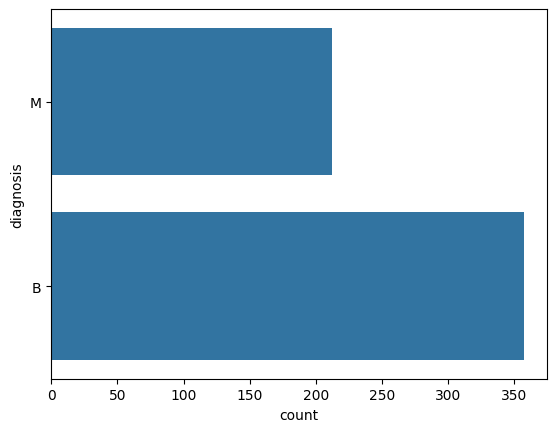

In [ ]:
#Visualize this count
sns.countplot(df['diagnosis'],label="Count")

In [ ]:
#Transform/ Encode the column diagnosis
dictionary = {'M':1, 'B':0}#Create a dictionary file
df.diagnosis = [dictionary[item] for item in df.diagnosis] #Change all 'M' to 1 and all 'B' to 0 in the diagnosis col

#Encoding categorical data values (Transforming categorical data/ Strings to integers)
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,1]= labelencoder_Y.fit_transform(df.iloc[:,1].values)
print(labelencoder_Y.fit_transform(df.iloc[:,1].values))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [ ]:
df.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


In [ ]:
#Get the correlation of the columns
df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872,NaN
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN


In [ ]:
#Split the data into independent 'X' and dependent 'Y' variables
X = df.iloc[:, 2:31].values #Notice I started from index  2 to 31, essentially removing the id column & diagnosis
Y = df.iloc[:, 1].values

Fitting Random Forest model...
Best Random Forest parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}
Predictions from Random Forest Classifier:
0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0

Actual values:
0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 0
Training HIRF 

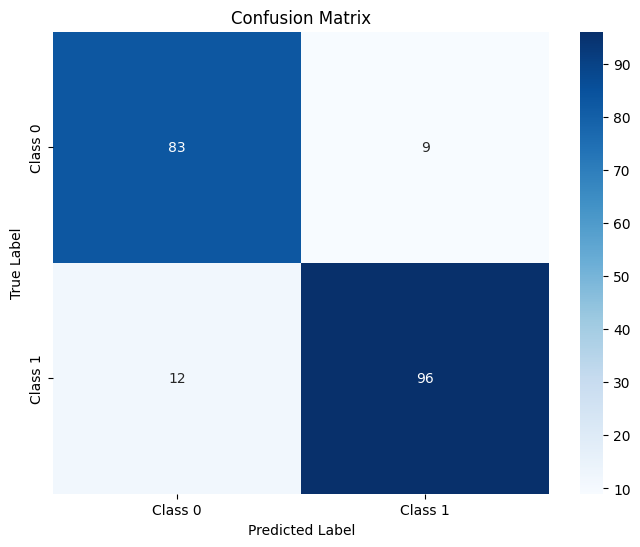

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import make_classification
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

class HGNN(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim):
        super(HGNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.bn1 = nn.BatchNorm1d(hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.bn2 = nn.BatchNorm1d(hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, output_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = self.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = self.fc3(x)
        return self.softmax(x)

    def fit(self, X_train, Y_train, epochs=100, lr=0.001, patience=10):
        self.train()
        optimizer = optim.Adam(self.parameters(), lr=lr)
        criterion = nn.CrossEntropyLoss()

        # Convert data to torch tensors
        X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
        Y_train_tensor = torch.tensor(Y_train, dtype=torch.long)

        best_loss = float('inf')
        patience_counter = 0

        for epoch in range(epochs):
            optimizer.zero_grad()
            outputs = self.forward(X_train_tensor)
            loss = criterion(outputs, Y_train_tensor)
            loss.backward()
            optimizer.step()

            # Early stopping check
            if loss.item() < best_loss:
                best_loss = loss.item()
                patience_counter = 0
            else:
                patience_counter += 1
                if patience_counter >= patience:
                    print(f"Early stopping at epoch {epoch + 1}")
                    break

            if (epoch + 1) % 10 == 0:
                print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

    def predict(self, X):
        self.eval()
        with torch.no_grad():
            X_tensor = torch.tensor(X, dtype=torch.float32)
            outputs = self.forward(X_tensor)
            _, predicted = torch.max(outputs.data, 1)
            return predicted.numpy()

class HIRF:
    def __init__(self, rf_model, hgnn_model):
        self.rf_model = rf_model
        self.hgnn_model = hgnn_model

    def fit(self, X_train, Y_train):
        self.rf_model.fit(X_train, Y_train)
        X_train_features = self.rf_model.predict_proba(X_train)
        self.hgnn_model.fit(X_train_features, Y_train)

    def predict(self, X):
        rf_probs = self.rf_model.predict_proba(X)
        return self.hgnn_model.predict(rf_probs)

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

def main(X_train, Y_train, X_test, Y_test):
    # Step 1: Fit the Random Forest model with hyperparameter tuning
    print("Fitting Random Forest model...")
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30, 40],
        'min_samples_split': [2, 5, 10, 20]
    }
    forest = RandomForestClassifier(random_state=0)
    grid_search = GridSearchCV(forest, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, Y_train)

    best_forest = grid_search.best_estimator_
    print("Best Random Forest parameters:", grid_search.best_params_)

    # Get predictions from Random Forest
    y_pred_forest = best_forest.predict(X_test)

    # Print predictions from Random Forest Classifier
    print("Predictions from Random Forest Classifier:")
    print(" ".join(map(str, y_pred_forest)))  # Joining predictions into a single line
    print()  # New line for better readability

    # Print actual values
    print("Actual values:")
    print(" ".join(map(str, Y_test)))  # Joining actual values into a single line

    # Step 2: Initialize HGNN model
    input_dim = best_forest.n_classes_  # Number of features from Random Forest
    hidden_dim1 = 256
    hidden_dim2 = 128
    output_dim = len(set(Y_train))

    hgnn = HGNN(input_dim, hidden_dim1, hidden_dim2, output_dim)

    # Step 3: Create HIRF model
    hirf_model = HIRF(best_forest, hgnn)

    # Step 4: Fit HIRF model
    print("Training HIRF model...")
    hirf_model.fit(X_train, Y_train)

    # Step 5: Evaluate the combined model
    print("Making predictions with the HIRF model...")
    y_pred_hirf = hirf_model.predict(X_test)

    # Evaluate the combined model predictions
    print('The HIRF Model Classification Report:')
    print(classification_report(Y_test, y_pred_hirf))
    print('The HIRF Model Testing Accuracy:', accuracy_score(Y_test, y_pred_hirf))

    # Plot the confusion matrix
    plot_confusion_matrix(Y_test, y_pred_hirf)

# Create a synthetic dataset with make_classification
X, Y = make_classification(n_samples=500, n_features=20, n_informative=15, n_redundant=5,
                           n_classes=2, random_state=42)

# Split data into training and testing sets (60% train, 40% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

# Now call the main function
main(X_train, Y_train, X_test, Y_test)


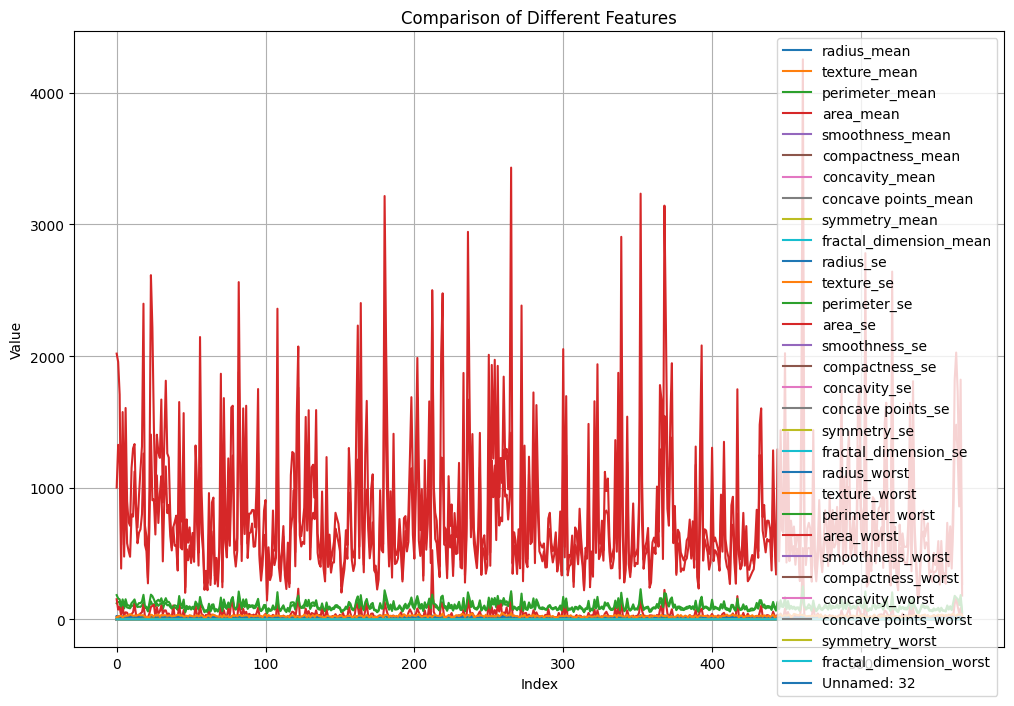

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have your DataFrame 'df' loaded

# Select only the numerical columns for plotting (excluding 'id' and 'diagnosis')
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Plot the data
plt.figure(figsize=(12, 8))  # Set the figure size

# Loop through the numerical columns to plot each one with a different color
for column in numerical_columns:
    if column not in ['id', 'diagnosis']:  # Skip non-numerical columns like 'id' and 'diagnosis'
        plt.plot(df.index, df[column], label=column)

# Customize the plot
plt.title("Comparison of Different Features")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend(loc="best")
plt.grid(True)
plt.show()


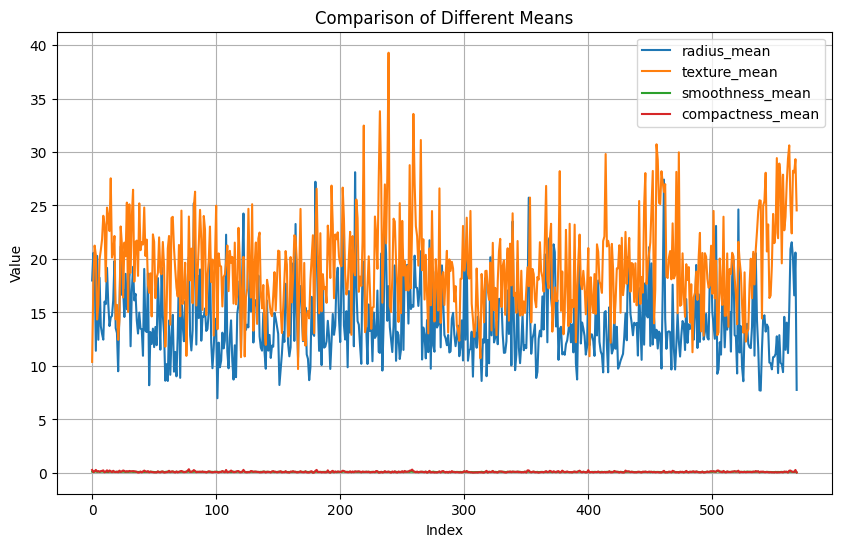

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have your DataFrame 'df' loaded

# Selecting some columns for plotting (you can choose other columns too)
columns_to_plot = ['radius_mean', 'texture_mean','smoothness_mean','compactness_mean']

# Plot the data
plt.figure(figsize=(10, 6))  # Set the figure size

# Loop through the columns to plot each one with a different color
for column in columns_to_plot:
    plt.plot(df.index, df[column], label=column)

# Customize the plot
plt.title("Comparison of Different Means")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend(loc="best")
plt.grid(True)
plt.show()


In [ ]:
# import pandas as pd

# # Assuming 'df' is the DataFrame containing the dataset and it has an 'id' column
# def predict_cancer_status(user_input_id, model, df):
#     # Check if the ID exists in the DataFrame
#     if user_input_id in df['id'].values:
#         # Get the corresponding data for the entered ID
#         user_data = df[df['id'] == user_input_id].drop(['id', 'diagnosis'], axis=1).values
#         # Predict cancer status using the model
#         prediction = model.predict(user_data)

#         # Output the result
#         if prediction == 1:
#             print(f"Person with ID {user_input_id} is diagnosed with cancer (Malignant).")
#         else:
#             print(f"Person with ID {user_input_id} is not diagnosed with cancer (Benign).")
#     else:
#         print(f"ID {user_input_id} not found in the dataset.")

# # Example: Ask the user to input an ID and check the cancer status
# user_input_id = input("Enter the ID of the person you want to check: ")
# predict_cancer_status(user_input_id, hirf_model, df)


Enter the ID of the person you want to check: 1
ID 1 not found in the dataset.


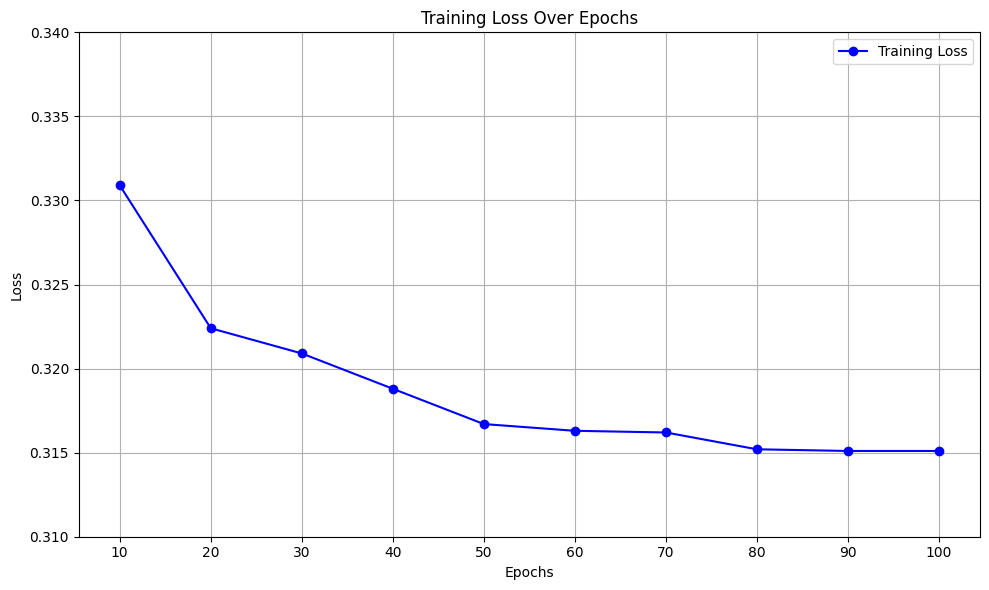

In [ ]:
import matplotlib.pyplot as plt

# Training loss data from your output
epochs = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
loss_values = [
    0.3309, 0.3224, 0.3209, 0.3188, 0.3167,
    0.3163, 0.3162, 0.3152, 0.3151, 0.3151
]

# Create a figure
plt.figure(figsize=(10, 6))

# Plot the loss values over epochs
plt.plot(epochs, loss_values, marker='o', color='blue', label='Training Loss')

# Add labels and title
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)  # Set x-ticks to the epoch values
plt.ylim(0.31, 0.34)  # Set y-axis limits for better visualization
plt.grid()
plt.legend()
plt.tight_layout()  # Adjust layout for better appearance
plt.show()


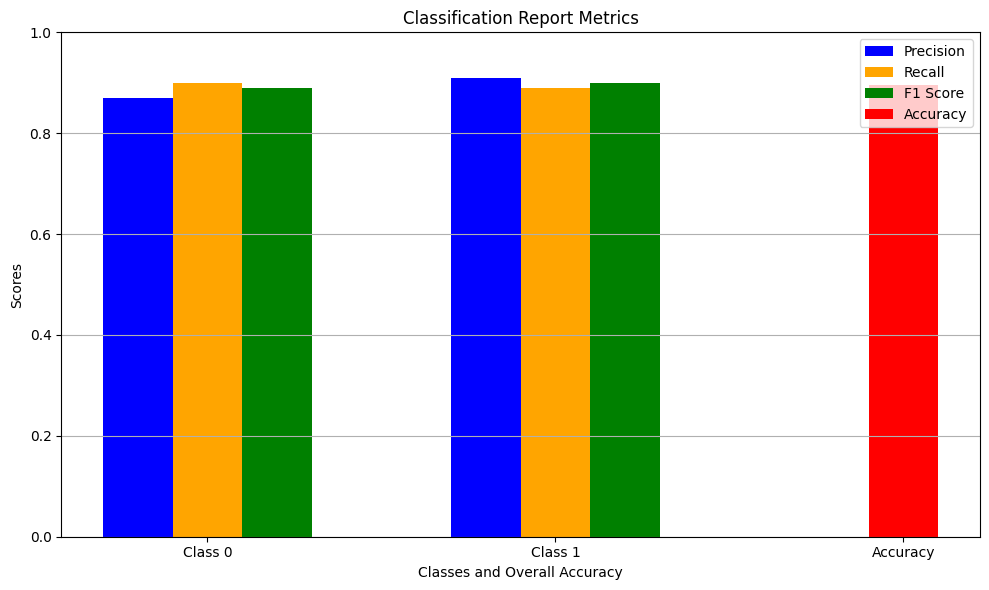

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the classification report
classes = ['Class 0', 'Class 1']
precision = [0.87, 0.91]
recall = [0.90, 0.89]
f1_score = [0.89, 0.90]
accuracy = 0.895

# Set up the bar width and positions
bar_width = 0.2
x = np.arange(len(classes))  # the label locations

# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot bars for precision, recall, and F1-score
plt.bar(x - bar_width, precision, width=bar_width, label='Precision', color='blue')
plt.bar(x, recall, width=bar_width, label='Recall', color='orange')
plt.bar(x + bar_width, f1_score, width=bar_width, label='F1 Score', color='green')

# Plot overall accuracy as a separate bar
plt.bar(len(classes), accuracy, width=bar_width, label='Accuracy', color='red')

# Add labels and title
plt.xlabel('Classes and Overall Accuracy')
plt.ylabel('Scores')
plt.title('Classification Report Metrics')
plt.xticks(list(x) + [len(classes)], classes + ['Accuracy'])  # Set x-tick labels
plt.ylim(0, 1)  # Set y-axis limit
plt.grid(axis='y')
plt.legend()
plt.tight_layout()  # Adjust layout for better appearance
plt.show()


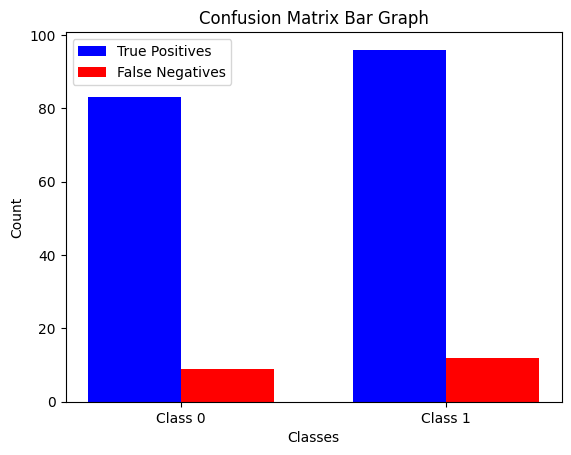

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Confusion matrix values
confusion_matrix = np.array([[83, 9],   # True class 0
                             [12, 96]]) # True class 1

# Bar labels
labels = ['Class 0', 'Class 1']
true_positives = [confusion_matrix[0, 0], confusion_matrix[1, 1]]
false_negatives = [confusion_matrix[0, 1], confusion_matrix[1, 0]]

# Bar width
bar_width = 0.35
x = np.arange(len(labels))

# Create bar graph
plt.bar(x - bar_width/2, true_positives, width=bar_width, label='True Positives', color='b')
plt.bar(x + bar_width/2, false_negatives, width=bar_width, label='False Negatives', color='r')

# Adding titles and labels
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Confusion Matrix Bar Graph')
plt.xticks(x, labels)
plt.legend()

# Display the graph
plt.show()


In [ ]:
from scipy import stats
import numpy as np
from statsmodels.stats.contingency_tables import mcnemar

# Function to compute McNemar's and Wilcoxon tests
def statistical_analysis(y_true, y_pred_rf, y_pred_hirf):
    # Creating confusion matrix for McNemar's test (2x2 matrix)
    # Calculate the number of instances for each combination of predictions
    matrix = np.zeros((2, 2))
    for true, rf_pred, hirf_pred in zip(y_true, y_pred_rf, y_pred_hirf):
        matrix[rf_pred, hirf_pred] += 1

    # McNemar's test
    mcnemar_result = mcnemar(matrix, exact=False, correction=True)

    # Wilcoxon signed-rank test
    wilcoxon_result = stats.wilcoxon(y_pred_rf, y_pred_hirf)

    return mcnemar_result, wilcoxon_result

# Example usage
y_true = [0, 1, 0, 1, 0, 1]  # True labels
y_pred_rf = [0, 0, 0, 1, 1, 1]  # Predictions from Random Forest
y_pred_hirf = [0, 1, 0, 1, 0, 1]  # Predictions from HIRF

mcnemar_result, wilcoxon_result = statistical_analysis(y_true, y_pred_rf, y_pred_hirf)

# Output the results
print("McNemar's Test Result:")
print(f"Statistic: {mcnemar_result.statistic}, p-value: {mcnemar_result.pvalue}")
print("\nWilcoxon Signed-Rank Test Result:")
print(f"Statistic: {wilcoxon_result.statistic}, p-value: {wilcoxon_result.pvalue}")


McNemar's Test Result:
Statistic: 0.5, p-value: 0.47950012218695337

Wilcoxon Signed-Rank Test Result:
Statistic: 1.5, p-value: 1.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_wilcoxon.py:199: UserWarning: Sample size too small for normal approximation.
  temp = _wilcoxon_iv(x, y, zero_method, correction, alternative, method, axis)


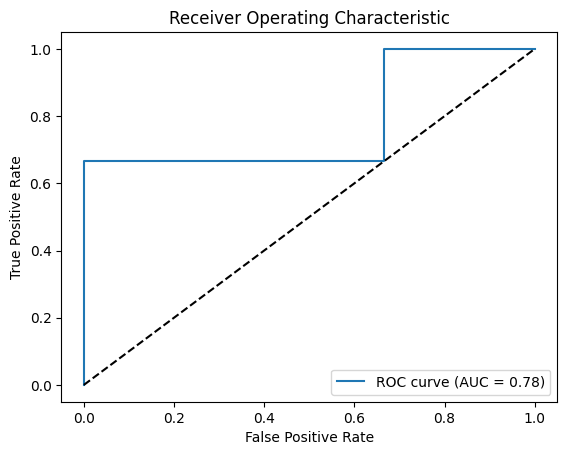

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curves(y_true, y_pred_prob):
    # Ensure that y_pred_prob contains probabilities, not class labels
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # The diagonal line (random classifier)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

# Example usage
y_true = [0, 0, 1, 1, 0, 1]  # True labels (binary)
y_pred_prob = [0.1, 0.4, 0.35, 0.8, 0.6, 0.9]  # Model's predicted probabilities for the positive class (class 1)

plot_roc_curves(y_true, y_pred_prob)
